# Business Case: Walmart - Confidence Interval and CLT

## About Walmart:

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## Business Problem:

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## Dataset:

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features: 

**User_ID:**	            User ID

**Product_ID:**	            Product ID

**Gender:**	                Sex of User

**Age:**	                Age in bins

**Occupation:**	            Occupation(Masked)

**City_Category:**	        Category of the City (A,B,C)

**StayInCurrentCityYears:**	Number of years stay in current city

**Marital_Status:**	        Marital Status

**ProductCategory:**	    Product Category (Masked)

**Purchase:**	            Purchase Amount

## Importing libraries:

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from matplotlib import figure 
from skimpy import skim


## Importing dataset:

In [45]:
df = pd.read_csv("/Users/nehajain/Desktop/DSML/Case Study/Walmart/walmart_data.csv")

In [46]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 550068 │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA  ┃ NA %  ┃ mean      ┃ sd    ┃ p0       ┃ p25      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ User_ID             │   0 │     0 │   1000000 │  1700 │  1000000 │  1000000 │  1000000 │  1000000 │ ▇█▆█▇▇ │  │
│ │ Occupation          │   0 │     0 │       8.1 │   6.5 │        0 │        2 │       14 │       20 │ █▅▃▃▃▄ │  │
│ │ Marital_Status      │   0 │     0 │      0.41 │  0.49 │        0 │        0 │        1 │        1 │ █    ▆ │  │
│ │ Product_Category    │   0 │     0 │       5.4 │   3.9 │        1 │        1 │        8 │       20 │ █▇▅▁▁  │  │
│ │ Purchase            │   0 │     0 │      9300 │  5000 │       12 │     5800 │    12000 │    24000 │ ▃█▆▃▂▁ │  │
│ └─────────────────────┴─────┴───────┴───────────┴───────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Product_ID                            │     0 │         0 │                        1 │              550068 │  │
│ │ Gender                                │     0 │         0 │                        1 │              550068 │  │
│ │ Age                                   │     0 │         0 │                        1 │              550068 │  │
│ │ City_Category                         │     0 │         0 │                        1 │              550068 │  │
│ │ Stay_In_Current_City_Years            │     0 │         0 │                        1 │              550068 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# 1. Defining Problem Statement and Analyzing basic metrics:

### 1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
### 2. Non-Graphical Analysis: Value counts and unique attributes ​
### 3. Visual Analysis - Univariate & Bivariate

- For continuous variable(s): Distplot, countplot, histogram for univariate analysis
- For categorical variable(s): Boxplot
- For correlation: Heatmaps, Pairplots

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df['Age'] = df['Age'].astype('category')

In [6]:
df['City_Category'] = df['City_Category'].astype('category')

In [7]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [180]:
df.describe(include = "object")

,Product_ID,Gender
count,550068,550068
unique,3631,2
top,P00265242,M
freq,1880,414259


In [141]:
df.shape

(550068, 10)

In [181]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [143]:
df.duplicated().sum()

0

In [182]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


In [145]:
type(df)

pandas.core.frame.DataFrame

In [183]:
df.dtypes

User_ID                          int64
Product_ID                      object
Gender                          object
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

In [10]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [184]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,2,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,Single,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,324731,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,8.000000,12054.000000


In [185]:
df.describe(include = 'object')

,Product_ID,Gender
count,550068,550068
unique,3631,2
top,P00265242,M
freq,1880,414259


In [186]:
df["Age"].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [187]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [188]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [189]:
df["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [190]:
df["Product_ID"].value_counts()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [191]:
df["Gender"].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [192]:
df["User_ID"].value_counts()

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64

In [193]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [13]:
np.round(df['Occupation'].value_counts(normalize = True) * 100, 2).cumsum()

Occupation
4     13.15
0     25.81
7     36.56
1     45.18
17    52.46
20    58.56
12    64.23
14    69.19
2     74.02
16    78.63
6     82.33
3     85.54
10    87.89
5     90.10
15    92.31
11    94.42
19    95.96
13    97.36
18    98.56
9     99.70
8     99.98
Name: proportion, dtype: float64

In [195]:
df['City_Category'].unique()

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

In [196]:
df["City_Category"].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [197]:
df['Marital_Status'].unique()

['Single', 'Married']
Categories (2, object): ['Single', 'Married']

In [198]:
df["Marital_Status"].value_counts()

Marital_Status
Single     324731
Married    225337
Name: count, dtype: int64

In [199]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [200]:
df["Product_Category"].value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [201]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

**The total revenue generated by Walmart from each gender:**

In [12]:
df.groupby(by = ['Gender'])['Purchase'].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

**The average revenue generated by Walmart from each gender per transaction:**

In [14]:
df.groupby(by = ['Gender'])['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

**The unique customers for each Marital Status:**

In [15]:
df.groupby(by = ['Marital_Status'])['User_ID'].nunique()

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

In [205]:
df.groupby(by = ['Age'])['Purchase'].sum()

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64

The revenue generated from different cities:

In [206]:
df.groupby(by = ['City_Category'])['Purchase'].sum()

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64

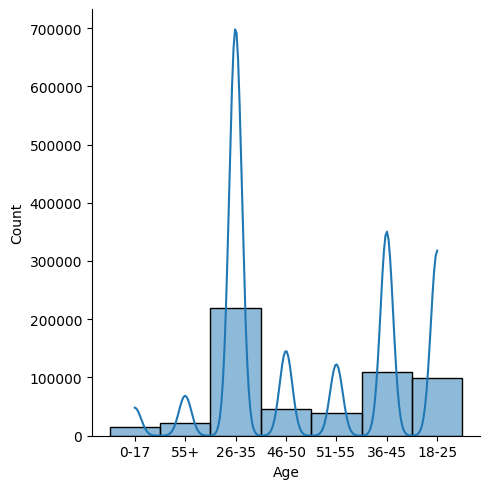

In [4]:
sns.displot(df["Age"],kde=True,bins=200) 
plt.show()

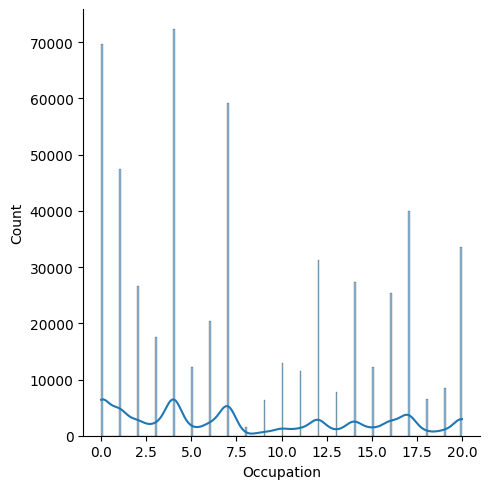

In [16]:
sns.displot(df["Occupation"],kde=True,bins = 200) 
plt.show()

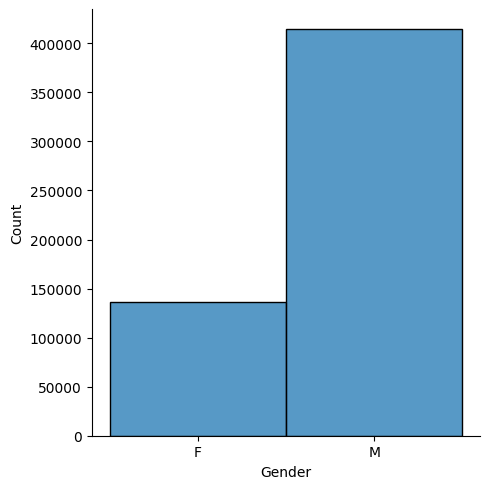

In [6]:
sns.displot(df["Gender"]) 
plt.show()

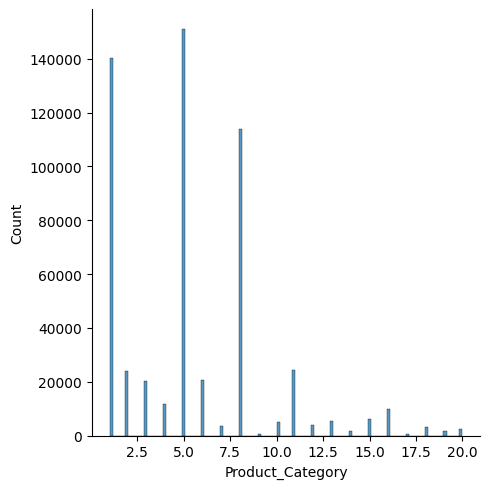

In [7]:
sns.displot(df["Product_Category"]) 
plt.show()

<Axes: ylabel='Frequency'>

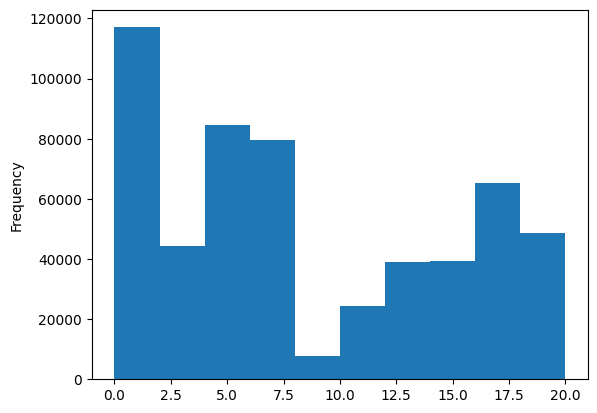

In [211]:
df['Occupation'].plot(kind="hist")

In [212]:
city_counts=df["City_Category"].value_counts() 
x_bar=city_counts.index
y_bar=city_counts

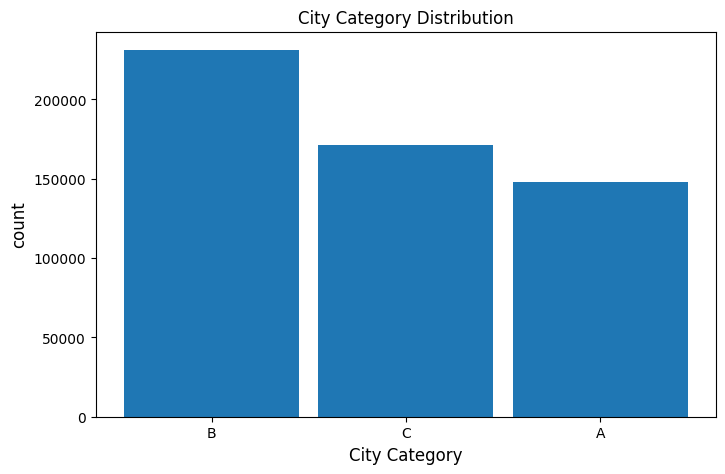

In [17]:

city_counts=df["City_Category"].value_counts() 
x_bar=city_counts.index
y_bar=city_counts
plt.figure(figsize=(8,5)) 
plt.bar(x_bar,y_bar,width=0.9) 

plt.xlabel("City Category",fontsize=12) 
plt.ylabel("count",fontsize=12) 
plt.title("City Category Distribution",fontsize=12) 
plt.show()

Text(0, 0.5, 'Count of Gender')

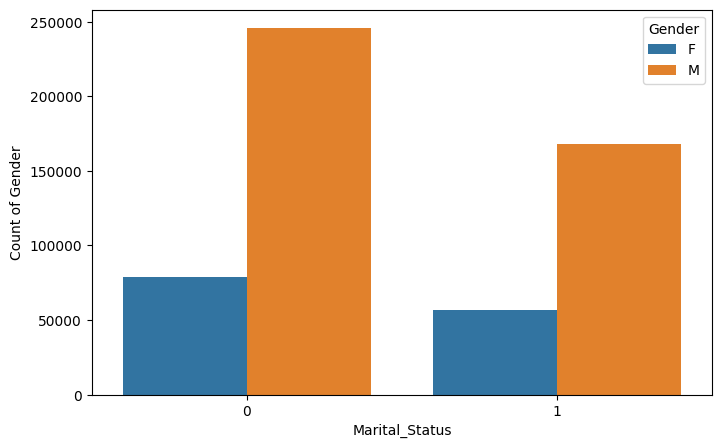

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='Marital_Status',hue='Gender',data=df)
plt.ylabel('Count of Gender')

### Boxplot:

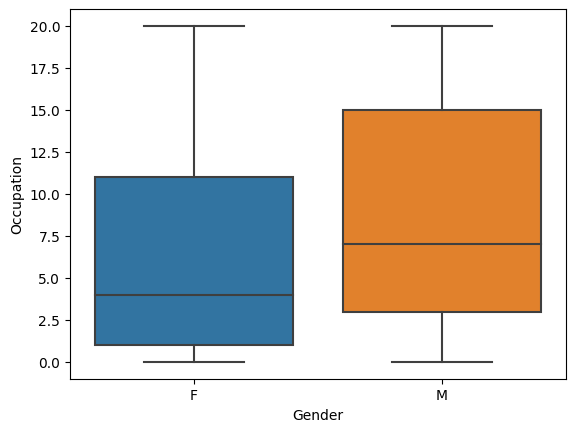

In [215]:
sns.boxplot(y = "Occupation",data = df,x="Gender")
plt.show()

In [216]:
IQR = np.percentile(df["Occupation"],75)-np.percentile(df["Occupation"],25)
Q3 = np.percentile(df["Occupation"],75)
Q1 = np.percentile(df["Occupation"],25)
UpperWhisker = Q3 + (1.5*(IQR))
UpperWhisker

32.0

In [218]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [109]:
df['Age_Category'] = df['Age']

In [110]:
df['Gender'].replace({'M': '0',
                    'F': '1',
                                }, inplace = True)
df['Age_Category'].replace({'0-17': 1,
                   '18-25': 2,
                   '26-35': 3,
                   '36-45': 4,
                   '46-50': 5,
                   '51-55': 6,
                   '55+' : 7
                                }, inplace = True)

<Axes: >

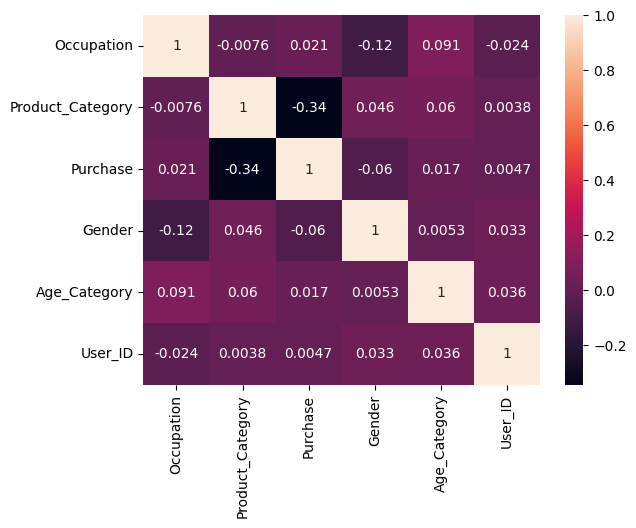

In [43]:
sns.heatmap(df[['Occupation','Product_Category','Purchase', 'Gender', 'Age_Category', 'User_ID']]
            .corr(), annot=True)

Text(0.5, 1.0, 'Occupation vs Age')

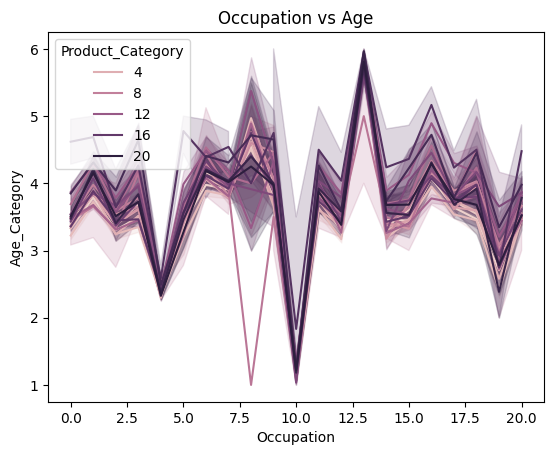

In [42]:
sns.lineplot(data=df, x='Occupation', y='Age_Category', hue='Product_Category');
plt.title('Occupation vs Age')

Text(0.5, 1.0, 'Gender vs Occupation')

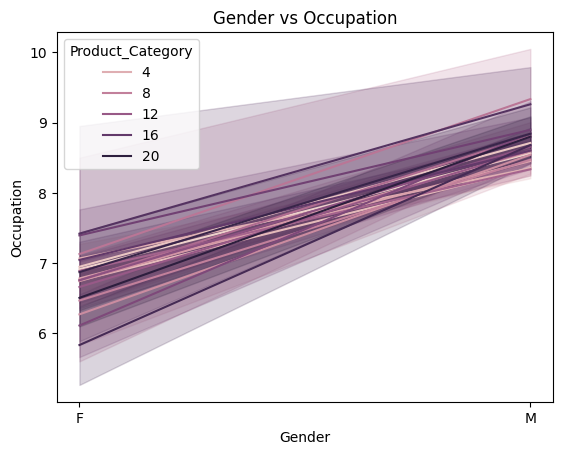

In [189]:
sns.lineplot(data=df, x='Gender', y='Occupation', hue='Product_Category');
plt.title('Gender vs Occupation')

([<matplotlib.patches.Wedge at 0x29d980050>,
 [Text(-0.990272918325375, -0.5846875637734613, 'Male'),
  Text(1.0763836663780117, 0.6355298598450186, 'Female')],
 [Text(-0.559719475575212, -0.3304755795241303, '75.31%'),
  Text(0.645830199826807, 0.3813179159070112, '24.69%')])

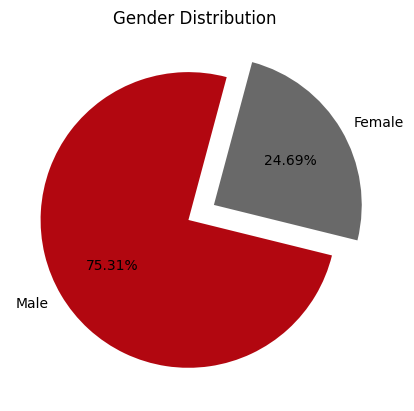

In [219]:
y = np.array([414259, 135809])

mylabels = ["Male", "Female"]
explode = (0.05, 0.15) 
plt.title("Gender Distribution")


plt.pie(y, labels = mylabels, autopct='%1.2f%%', explode=explode, colors=['#b20710', 'dimgrey'], startangle=75)



## Pairplot:

In [5]:
a = df[['Age', 'Occupation', 'Gender', 'Stay_In_Current_City_Years', 'Product_Category', 'Purchase']]

<function matplotlib.pyplot.show(close=None, block=None)>

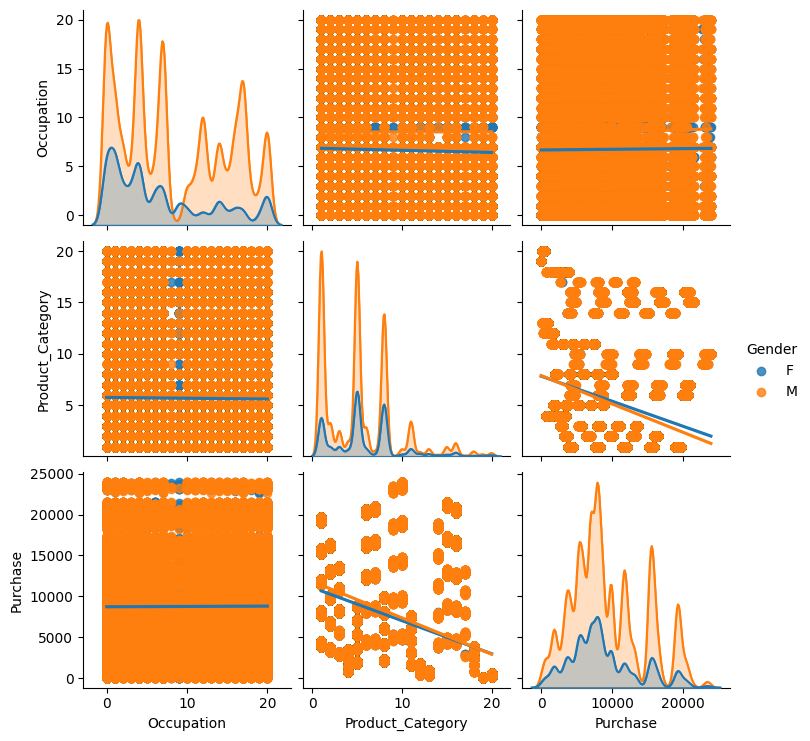

In [6]:
x = sns.pairplot(a,
                 kind = 'reg',
                 hue = 'Gender')

x.map_diag(sns.kdeplot)
plt.show

In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Insights:

- Close to 1000 purchases are made from the most frequent visitors and the least frequent users make 6-7 purchases

- ‘P00265242’ is the hottest product of Walmart having maximum number of sales

- The user distribution: 
    - **Male**: 414,259
    - **Female**: 135,809

- The most frequent purchasing age group lies in the range 26-35

- The people staying in the city category B makes more purchases

- People staying in the city for only one or less than one year makes more purchases

- Unmarried people make more purchases than married people.
 
- Product categories 5, 1 and 8 sell more than other categories.

- Product categories 17 and 9 sell the least.

# 2. Missing Value & Outlier Detection:

In [11]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### Outlier Check:

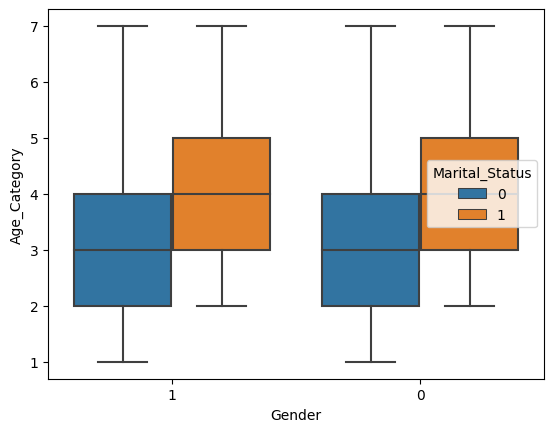

In [111]:
sns.boxplot(data=df,
           x="Gender",
           y="Age_Category",
           hue="Marital_Status")
        
        
           
plt.show()

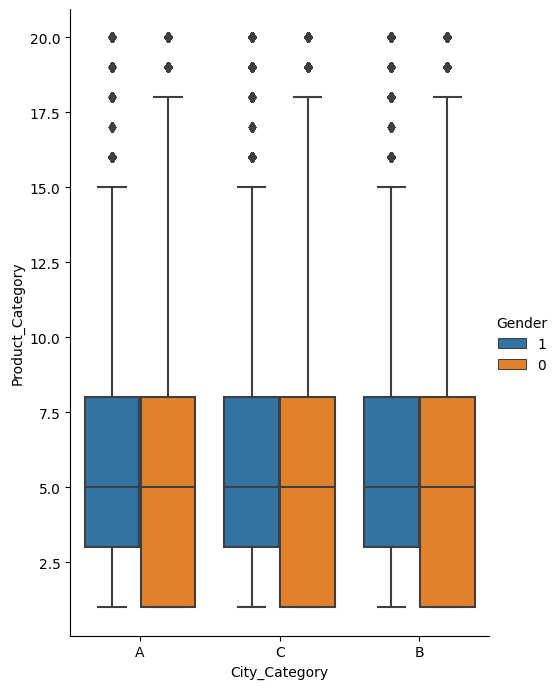

In [78]:
sns.catplot(y= "Product_Category",x = "City_Category",hue="Gender" ,kind = "box", data= df,height=7, aspect=8/11 )
plt.xticks(rotation = 0)
plt.show()

In [80]:
IQR = np.percentile(df["Product_Category"],75)  -   np.percentile(df["Product_Category"],25)
Q3 = np.percentile(df["Product_Category"],75)
Q1 = np.percentile(df["Product_Category"],25)
UpperWhisker = Q3 + (1.5*(IQR))
UpperWhisker

18.5

In [82]:
outlier_data = df[df["Product_Category"]>UpperWhisker]
print("Outliers : ",len(outlier_data))

Outliers :  4153


# 3. Business Insights based on Non- Graphical and Visual Analysis:

- Comments on the range of attributes
- Comments on the distribution of the variables and relationship between them
- Comments for each univariate and bivariate plot

### Gender Analysis:

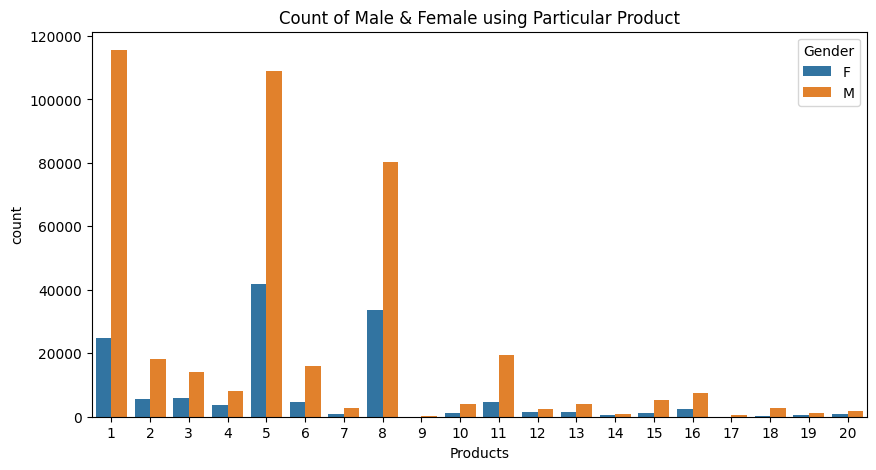

In [20]:

plt.figure(figsize=(10,5))
sns.countplot(x = "Product_Category", data= df, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male & Female using Particular Product")
plt.show()

In [96]:
pd.crosstab([df["Product_Category"]],df["Gender"],margins=True)

Gender,0,1,All
Product_Category,,,
1,115547,24831,140378
2,18206,5658,23864
3,14207,6006,20213
4,8114,3639,11753
5,108972,41961,150933
6,15907,4559,20466
7,2778,943,3721
8,80367,33558,113925
9,340,70,410


In [99]:
((pd.crosstab(df["Product_Category"],df["Gender"],margins=True))/180)*100

Gender,0,1,All
Product_Category,,,
1,64192.777778,13795.000000,77987.777778
2,10114.444444,3143.333333,13257.777778
3,7892.777778,3336.666667,11229.444444
4,4507.777778,2021.666667,6529.444444
5,60540.000000,23311.666667,83851.666667
6,8837.222222,2532.777778,11370.000000
7,1543.333333,523.888889,2067.222222
8,44648.333333,18643.333333,63291.666667
9,188.888889,38.888889,227.777778


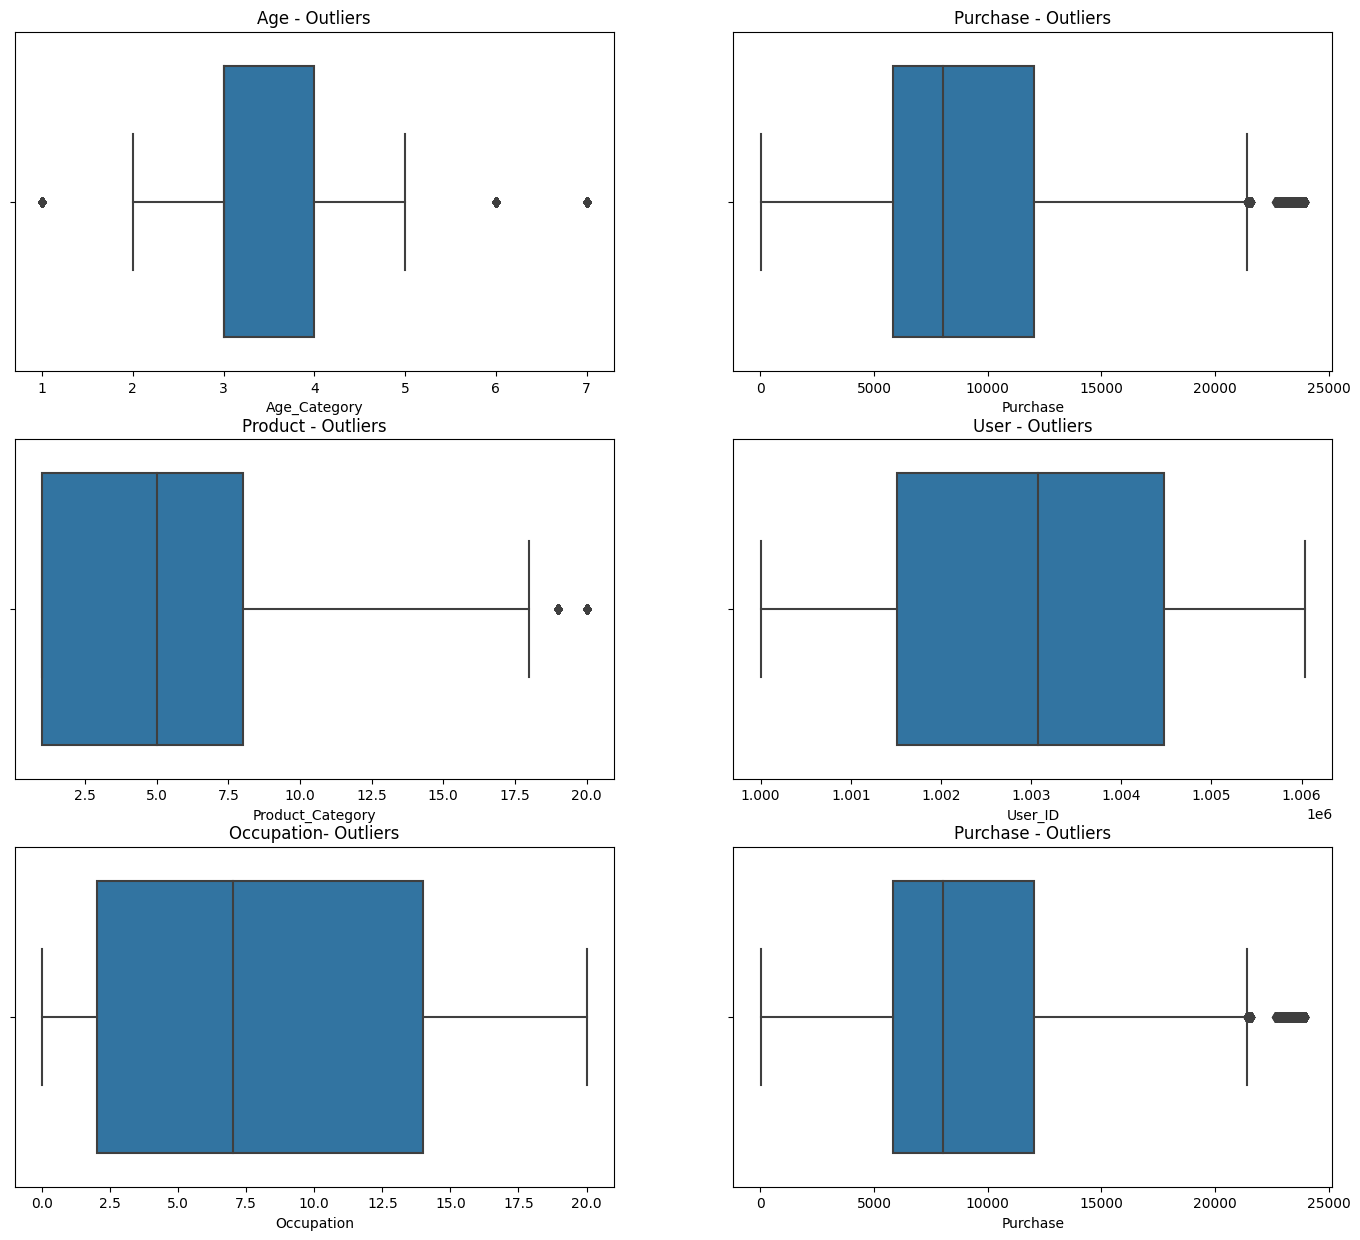

In [115]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(17,15))

sns.boxplot(data=df, x="Age_Category", ax=ax[0,0])
ax[0,0].set_title('Age - Outliers')


sns.boxplot(data=df, x="Purchase", ax=ax[0,1])
ax[0,1].set_title('Purchase - Outliers')


sns.boxplot(data=df, x="Product_Category", ax=ax[1,0])
ax[1,0].set_title('Product - Outliers')


sns.boxplot(data=df, x="User_ID", ax=ax[1,1])
ax[1,1].set_title('User - Outliers')


sns.boxplot(data=df, x="Occupation", ax=ax[2,0])
ax[2,0].set_title('Occupation- Outliers')


sns.boxplot(data=df, x="Purchase", ax=ax[2,1])
ax[2,1].set_title('Purchase - Outliers')

plt.show()


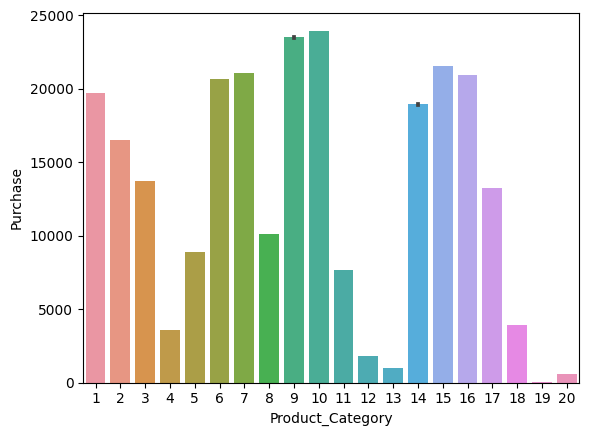

In [142]:
sns.barplot(data=df,
           x="Product_Category",
           y="Purchase",
           estimator=np.max)
plt.show()

[]

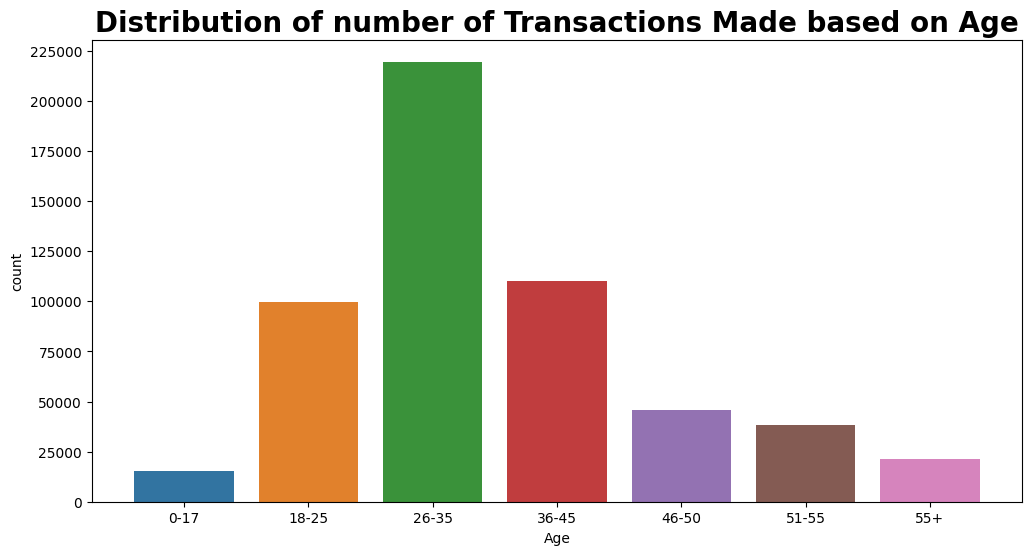

In [30]:
plt.figure(figsize = (12, 6))
plt.title('Distribution of number of Transactions Made based on Age', 
          fontsize = 20, 
          fontweight = 600,
        
         
          )
plt.yticks(np.arange(0, 250001, 25000))

sns.countplot(data = df, x = 'Age', 
              order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.plot()

## Insights:

 - The age group that involves in maximum purchasing is 26-35 years
 
 - People purchase the products have a range of 5000 - 12000 are maximum in number
 - There are some people who have made the purchase till the amount of 25000, but they are very less in number.
 - Product category 1, 5 and 8 are maximum bought products out of all 20 products categories.
 - Unmarried people have more purchases that married people
 - People of occupation 0,4 and 7 have made more purchases than other occupations.
 - People of occupation 8 have made least purchases.

# 4. Answering questions: 

### 1. Are women spending more money per transaction than men? Why or Why not? 

### 2. Confidence intervals and distribution of the mean of the expenses by female and male customers 

### 3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

### 4. Results when the same activity is performed for Married vs Unmarried

### 5. Results when the same activity is performed for Age


In [36]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [37]:
# Gender wise value counts in avg_amt_df
amt_df['Gender'].value_counts()


Gender
M    4225
F    1666
Name: count, dtype: int64

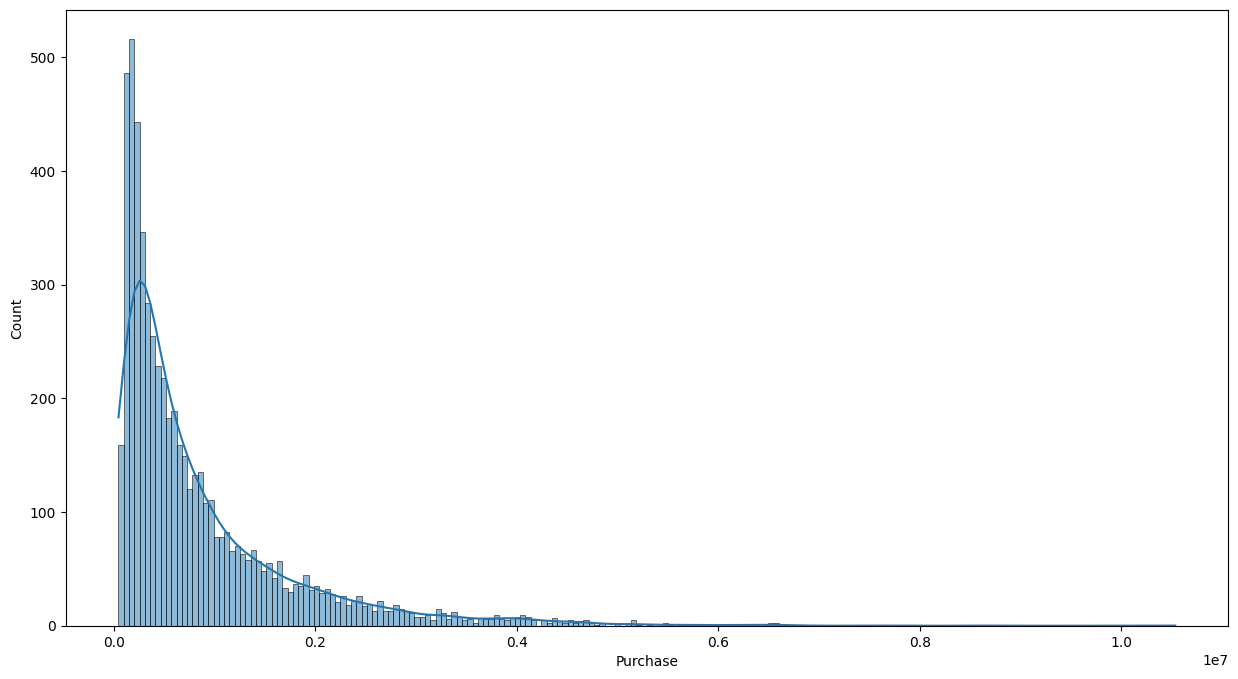

In [38]:
plt.figure(figsize = (15, 8))
sns.histplot(data = amt_df, x = 'Purchase', kde = True, bins = 200)
plt.show()

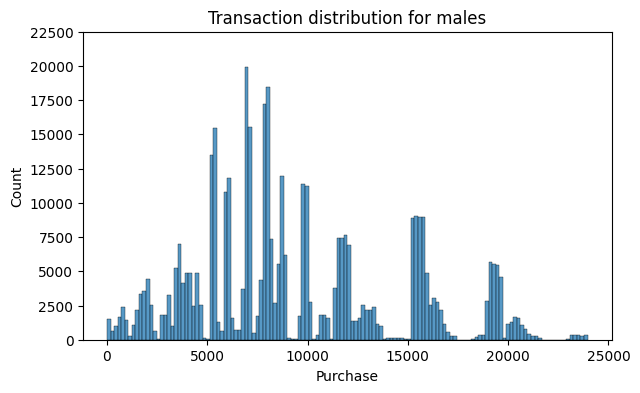

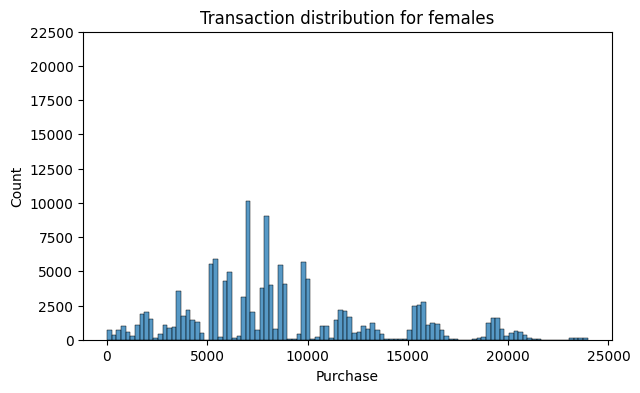

In [39]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)

df_male = df[df['Gender'] == 'M']
sns.histplot(data = df_male, x = 'Purchase')
plt.title('Transaction distribution for males')
plt.yticks(np.arange(0, 22550, 2500))


plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 2)
df_female = df[df['Gender'] == 'F']
sns.histplot(data = df_female, x = 'Purchase')
plt.title('Transaction distribution for females')
plt.yticks(np.arange(0, 22550, 2500))
plt.show()


In [40]:
df_cust_gender = pd.DataFrame(df.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum()).reset_index()
df_cust_gender

,Gender,User_ID,Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


In [66]:
df_male_customer = df_cust_gender.loc[df_cust_gender['Gender'] == 'M']
df_female_customer = df_cust_gender.loc[df_cust_gender['Gender'] == 'F']

Text(0, 0.5, 'sample_mean')

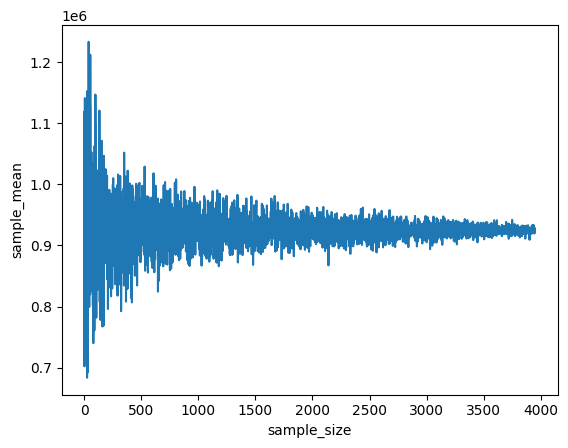

In [67]:
sample_size_trend=[]
for i in range(50,4000):
    sample_mean= df_male_customer['Purchase'].sample(i).mean()
    sample_size_trend.append(sample_mean)
plt.plot(sample_size_trend)
plt.xlabel("sample_size")
plt.ylabel("sample_mean")

Text(0, 0.5, 'sample_mean')

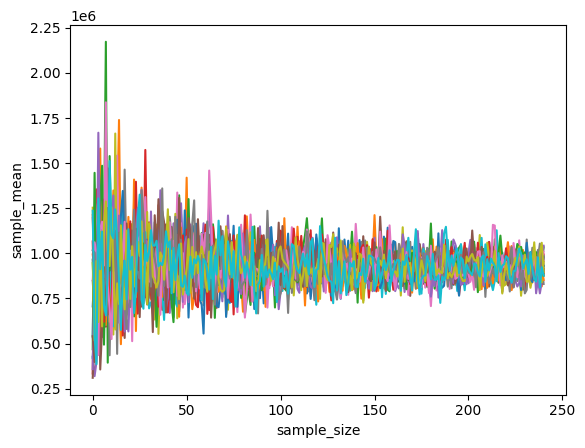

In [68]:
sample_size_trend=[]
for j in range(20):
    for i in range(5,246):
        sample_mean= df_male_customer['Purchase'].sample(i).mean()
        sample_size_trend.append(sample_mean)
    plt.plot(sample_size_trend)
    sample_size_trend=[]
plt.xlabel("sample_size")
plt.ylabel("sample_mean")


In [82]:
male_margin_of_error_clt = 1.96*df_male_customer['Purchase'].std()/np.sqrt(len(df_male_customer)) 
male_sample_mean = df_male_customer['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt 
male_upper_lim = male_sample_mean + male_margin_of_error_clt
female_margin_of_error_clt = 1.96*df_female_customer['Purchase'].std()/np.sqrt(len(df_female_customer)) 
female_sample_mean = df_female_customer['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt 
female_upper_lim = female_sample_mean + female_margin_of_error_clt
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim)) 
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


Text(0, 0.5, 'sample_mean')

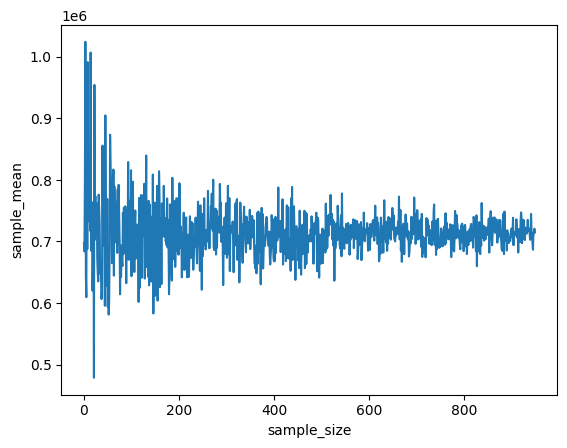

In [30]:
sample_size_trend=[]
for i in range(50,1000):
    sample_mean= df_female_customer['Purchase'].sample(i).mean()
    sample_size_trend.append(sample_mean)
plt.plot(sample_size_trend)
plt.xlabel("sample_size")
plt.ylabel("sample_mean")

Text(0, 0.5, 'sample_mean')

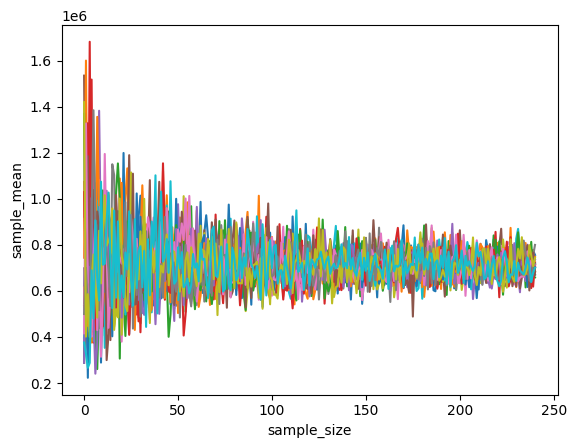

In [57]:
sample_size_trend=[]
for j in range(20):
    for i in range(5,246):
        sample_mean= df_female_customer['Purchase'].sample(i).mean()
        sample_size_trend.append(sample_mean)
    plt.plot(sample_size_trend)
    sample_size_trend=[]
plt.xlabel("sample_size")
plt.ylabel("sample_mean")

**The confidence interval of each male's total spending on the Black Friday:**

In [31]:

bootstrapped_sample_mean_male=[]
size = df_male_customer['Purchase'].shape[0]
for i in range(10000):
    bootstrapped_sample=df_male_customer['Purchase'].sample(size, replace = True).mean()
    bootstrapped_sample_mean_male.append((bootstrapped_sample))


<Axes: ylabel='Count'>

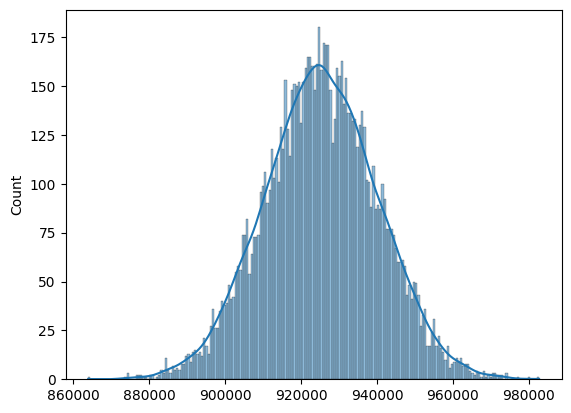

In [32]:
sns.histplot(bootstrapped_sample_mean_male, kde = True, bins = 200)

The bootstrapping method makes it easier to estimate the confidence interval for the total purchases made by each male customer on Black Friday at Walmart, having the count of males as 4225 

**The confidence interval of each female's total spending on the Black Friday:**

In [89]:

bootstrapped_sample_mean_female=[]
size = df_female_customer['Purchase'].shape[0]
for i in range(10000):
    bootstrapped_sample=df_female_customer['Purchase'].sample(size, replace = True).mean()
    bootstrapped_sample_mean_female.append((bootstrapped_sample))


<Axes: ylabel='Count'>

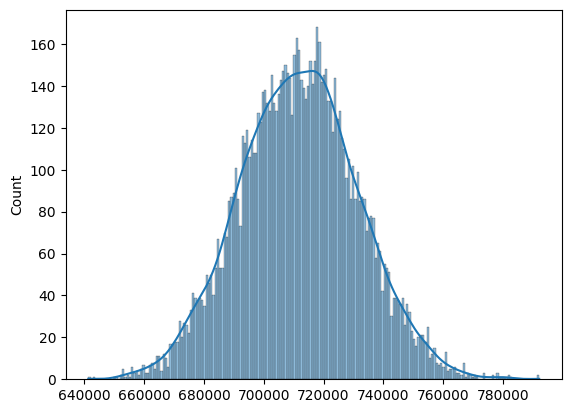

In [90]:
sns.histplot(bootstrapped_sample_mean_female, kde = True, bins = 200)

The bootstrapping method makes it easier to estimate the confidence interval for the total purchases made by each female customer on Black Friday at Walmart, having the count of males as 1666

[]

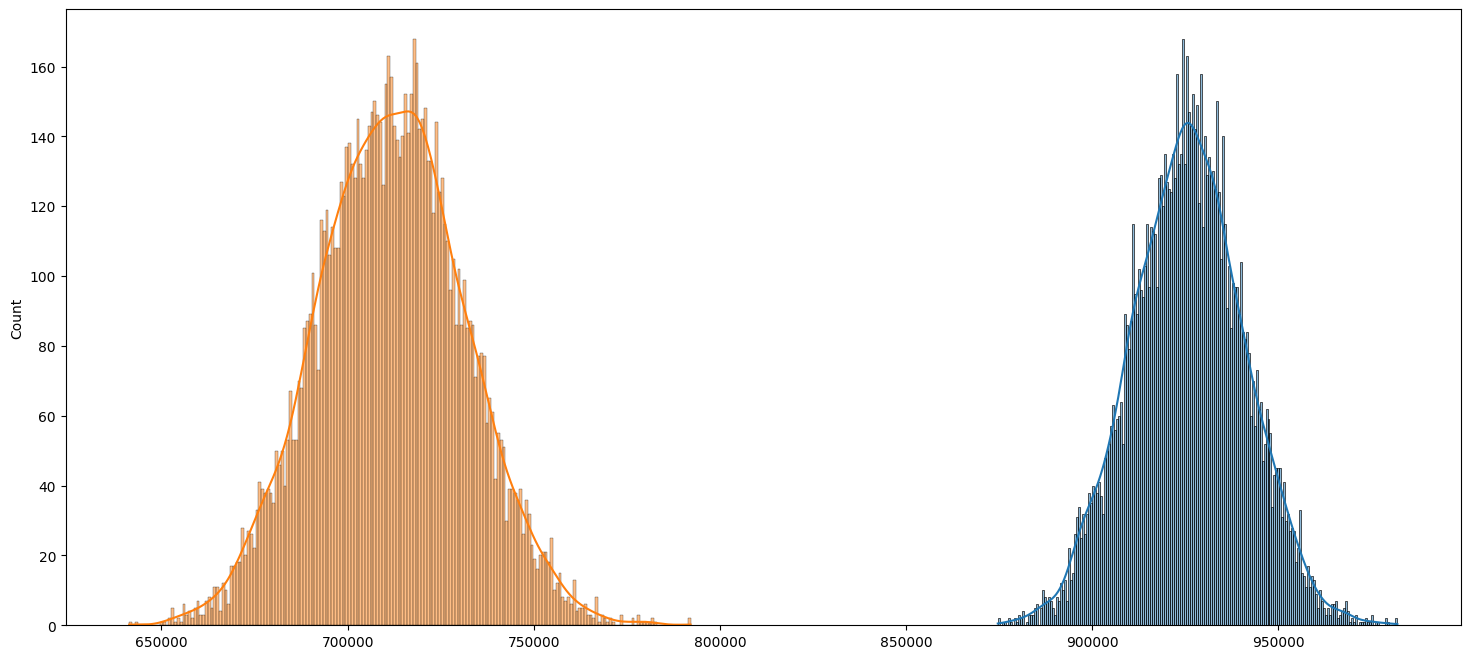

In [94]:
plt.figure(figsize = (18, 8))

sns.histplot(bootstrapped_sample_mean_male, kde = True, bins = 200)

sns.histplot(bootstrapped_sample_mean_female, kde = True, bins = 200)


plt.plot()

**The above distribution represents the male's and female's total amount of purchases that lies in left and right side of the distribution. Here, it concludes that males tend to spend more for purchasing stuffs as compared to females. Hence, we can identify the spending behaviour between males and females.**

Some predictable reasons for male spending more than females:

- Product preference: May be they tend to buy expensive products like electronics, gadgets or luxury goods. This may lead to fall them into buying higher price categories.

- Interest based spending: They may like to spend on more on the products that are interest based such as sports or fitness equipment, gaming, or collectibles.

- Targeting audience: The advertisements or marketing strategies may target them based on their products and services they prefer. These strategies may influence their decisions to spend more.

These are just assumptions considering the factors that may influence to spend more in these markerts.

#### The mean purchase made by each user belonging to different Marital Status:

In [60]:
ms_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
ms_df = ms_df.reset_index()
ms_df

,User_ID,Marital_Status,Purchase
0,1000001,Single,334093
1,1000001,Married,0
2,1000002,Single,810472
3,1000002,Married,0
4,1000003,Single,341635
...,...,...,...
11777,1006038,Married,0
11778,1006039,Single,0
11779,1006039,Married,590319
11780,1006040,Single,1653299


In [54]:
# Marital_Status wise value counts in ms_df
ms_df['Marital_Status'].value_counts()

Marital_Status
0    3417
1    2474
Name: count, dtype: int64

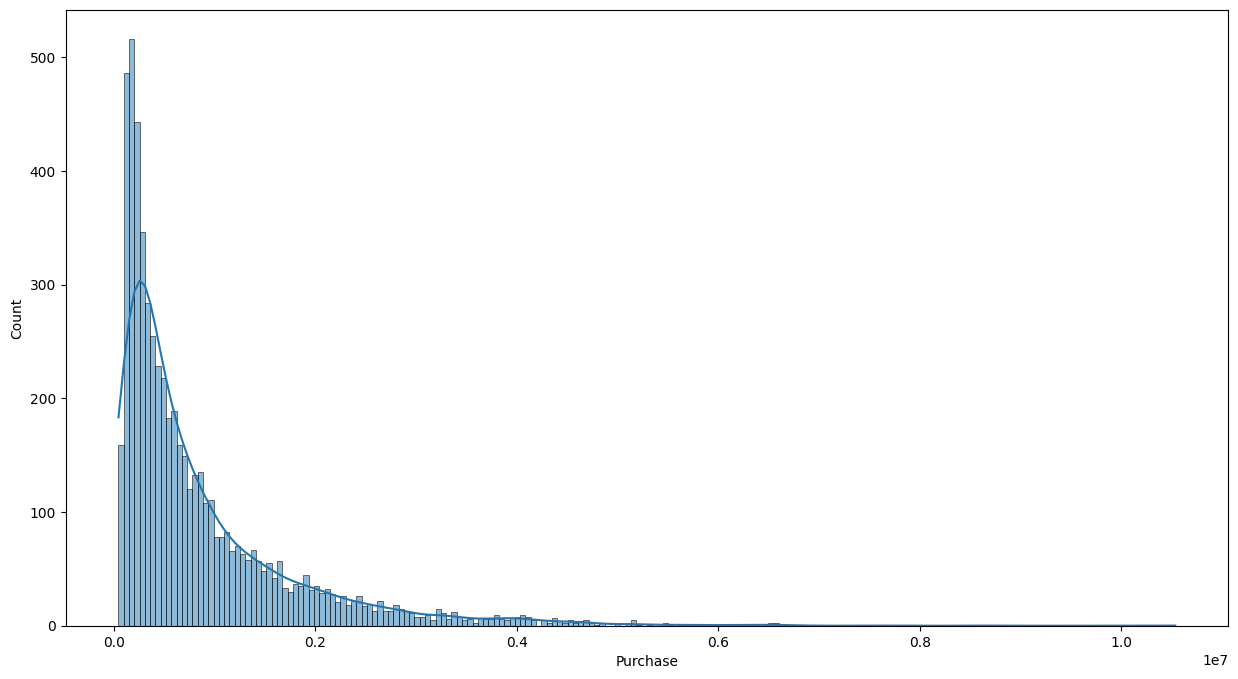

In [55]:
plt.figure(figsize = (15, 8))
sns.histplot(data = ms_df, x = 'Purchase', kde = True, bins = 200)
plt.show()

In [88]:
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [89]:
df_single = df.loc[df['Marital_Status'] == 'Single']
df_married = df.loc[df['Marital_Status'] == 'Married']

In [90]:
df_single = df_single.groupby('User_ID')['Purchase'].sum().reset_index()
df_married = df_married.groupby('User_ID')['Purchase'].sum().reset_index()

In [44]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Single')

Text(0, 0.5, 'Mean Purchase Value')

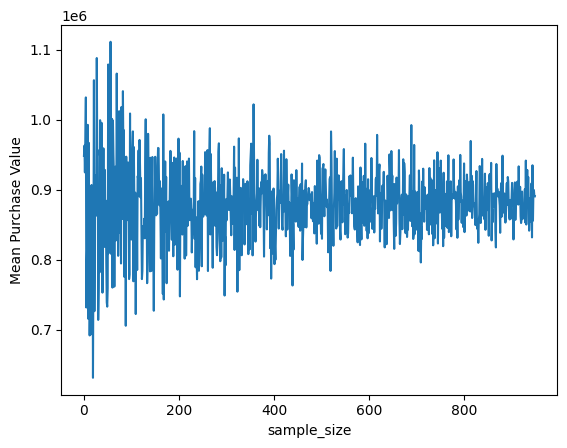

In [62]:
sample_size_trend=[]
for i in range(50,1000):
    sample_mean= df_single['Purchase'].sample(i).mean()
    sample_size_trend.append(sample_mean)
plt.plot(sample_size_trend)
plt.xlabel("sample_size")
plt.ylabel("Mean Purchase Value")

Text(0, 0.5, 'Mean Purchase Value')

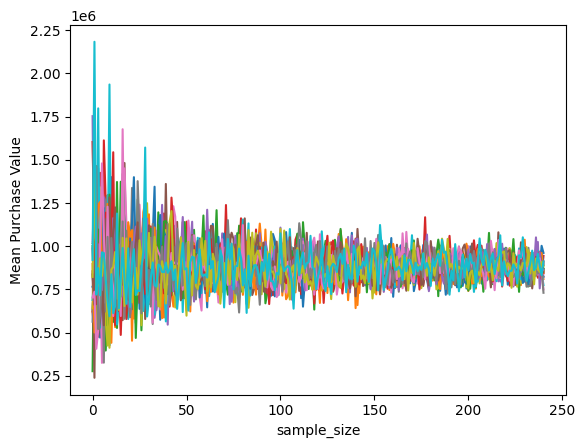

In [63]:
sample_size_trend=[]
for j in range(20):
    for i in range(5,246):
        sample_mean= df_single['Purchase'].sample(i).mean()
        sample_size_trend.append(sample_mean)
    plt.plot(sample_size_trend)
    sample_size_trend=[]
plt.xlabel("sample_size")
plt.ylabel("Mean Purchase Value")


Text(0, 0.5, 'Mean Purchase Value')

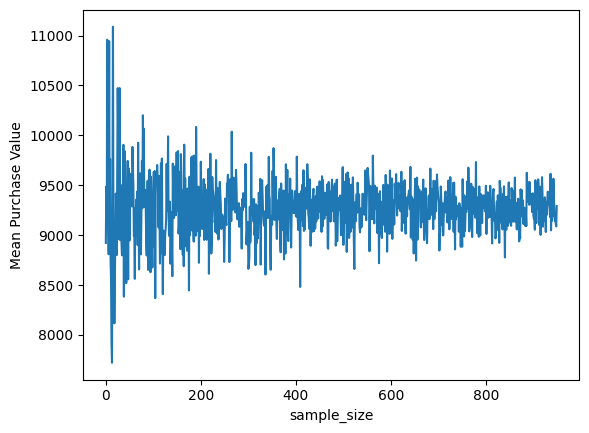

In [127]:
sample_size_trend=[]
for i in range(50,1000):
    sample_mean= df_married['Purchase'].sample(i).mean()
    sample_size_trend.append(sample_mean)
plt.plot(sample_size_trend)
plt.xlabel("sample_size")
plt.ylabel("Mean Purchase Value")

Text(0, 0.5, 'Mean Purchase Value')

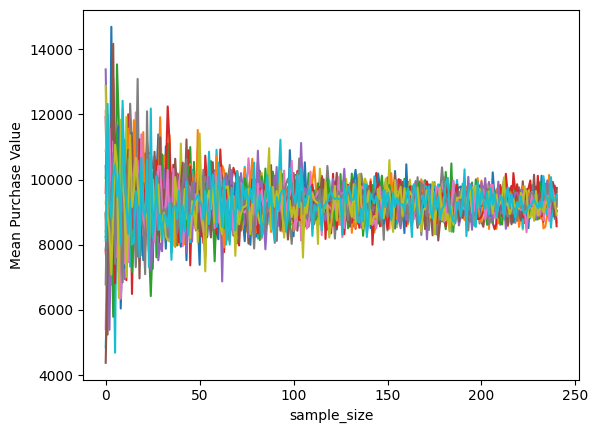

In [126]:
sample_size_trend=[]
for j in range(20):
    for i in range(5,246):
        sample_mean= df_married['Purchase'].sample(i).mean()
        sample_size_trend.append(sample_mean)
    plt.plot(sample_size_trend)
    sample_size_trend=[]
plt.xlabel("sample_size")
plt.ylabel("Mean Purchase Value")

**The confidence interval of each single's total spending on the Black Friday:**

In [68]:

bootstrapped_sample_mean_single=[]
size = df_single['Purchase'].shape[0]
for i in range(10000):
    bootstrapped_sample=df_single['Purchase'].sample(size, replace = True).mean()
    bootstrapped_sample_mean_single.append((bootstrapped_sample))


<Axes: ylabel='Count'>

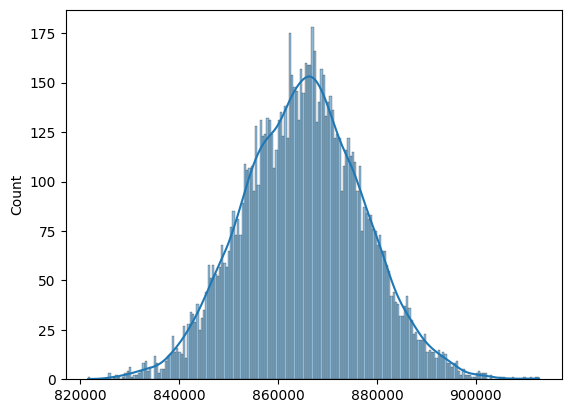

In [248]:
sns.histplot(bootstrapped_sample_mean_single, kde = True, bins = 200)

In [98]:
np.mean(bootstrapped_sample_mean_single)

880546.081860755

**The confidence interval of each married's total spending on the Black Friday:**

In [164]:

bootstrapped_sample_mean_married=[]
size = df_married['Purchase'].shape[0]
for i in range(10000):
    bootstrapped_sample=df_married['Purchase'].sample(size, replace = True).mean()
    bootstrapped_sample_mean_married.append((bootstrapped_sample))

<Axes: ylabel='Count'>

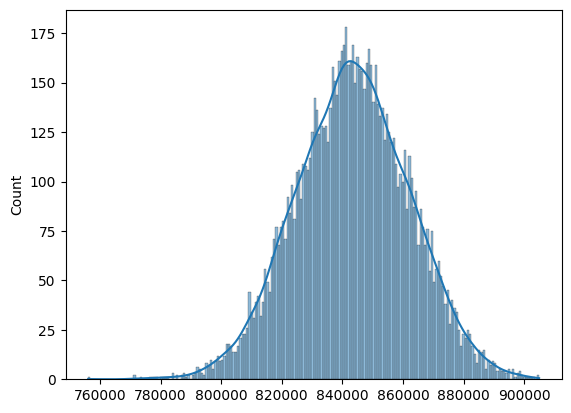

In [65]:
sns.histplot(bootstrapped_sample_mean_married, kde = True, bins = 200)

In [66]:
np.mean(bootstrapped_sample_mean_married)

843424.4447854891

[]

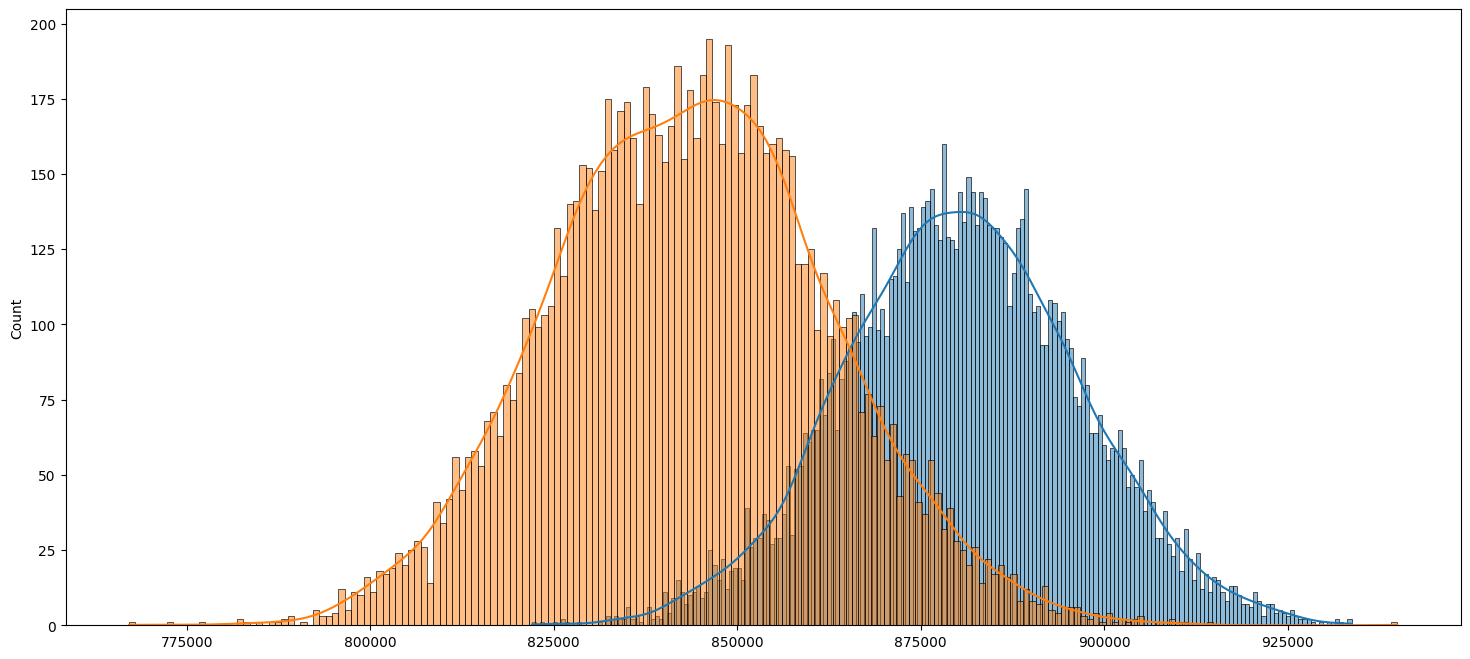

In [165]:
plt.figure(figsize = (18, 8))

sns.histplot(bootstrapped_sample_mean_single, kde = True, bins = 200)

sns.histplot(bootstrapped_sample_mean_married, kde = True, bins = 200)


plt.plot()

It can be inferred from the above chart that the distributions of singles' total spending and married individuals' total spending overlap. It suggests that there is no significant difference in spending habits between these two groups. Here are some possible inferences that can be drawn from this:

 - **Relationship status does not strongly influence spending**: Being single or married does not appear to have a substantial impact on individuals' spending patterns. Other factors such as income, personal preferences, and financial priorities may play a more significant role in determining spending habits.

 - **Similar consumption patterns**: Singles and married individuals may have similar lifestyles and consumption patterns, leading to comparable spending behaviors. They may allocate their income in comparable ways, making similar purchasing decisions and spending on similar categories of products or services.

 - **Financial considerations**: Both singles and married individuals may have similar financial responsibilities and constraints, leading to similar spending levels. They may have similar obligations such as housing costs, bills, and other financial commitments, which influence their overall spending capacity.

 - **Individual differences outweigh relationship status**: Other individual characteristics, such as personal values, interests, and financial habits, may have a more significant impact on spending behavior than relationship status. These factors can vary widely within each group, resulting in overlapping spending distributions.


**Determining the mean purchase made by each user based on their age groups:**

In [112]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [104]:
df_age_0_to_17 = df.loc[df['Age'] == '0-17']
df_age_18_to_25 = df.loc[df['Age'] == '18-25']
df_age_26_to_35 = df.loc[df['Age'] == '26-35']
df_age_36_to_45 = df.loc[df['Age'] == '36-45']
df_age_46_to_50 = df.loc[df['Age'] == '46-50']
df_age_51_to_55 = df.loc[df['Age'] == '51-55']
df_age_above_55 = df.loc[df['Age'] == '55+']


### For Age 0 to 17 years:

In [144]:
df_age_0_to_17= df_age_0_to_17.groupby(['User_ID', 'Age'])[['Purchase']].sum().reset_index()


Text(0, 0.5, 'sample_mean')

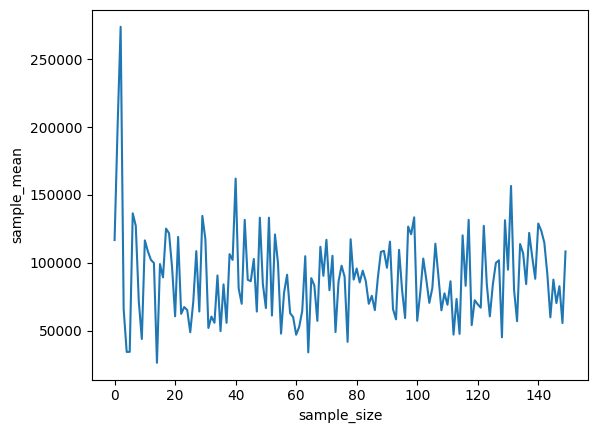

In [148]:
sample_size_trend=[]
for i in range(50,200):
    sample_mean= df_age_0_to_17['Purchase'].sample(i).mean()
    sample_size_trend.append(sample_mean)
plt.plot(sample_size_trend)
plt.xlabel("sample_size")
plt.ylabel("sample_mean")

**The confidence interval of total spending for age group 0-17 on the Black Friday:**

In [157]:
bootstrapped_sample_mean_0_17=[]
size = df_age_0_to_17['Purchase'].shape[0]
for i in range(10000):
    bootstrapped_sample=df_age_0_to_17['Purchase'].sample(size, replace = True).mean()
    bootstrapped_sample_mean_0_17.append((bootstrapped_sample))

<Axes: ylabel='Count'>

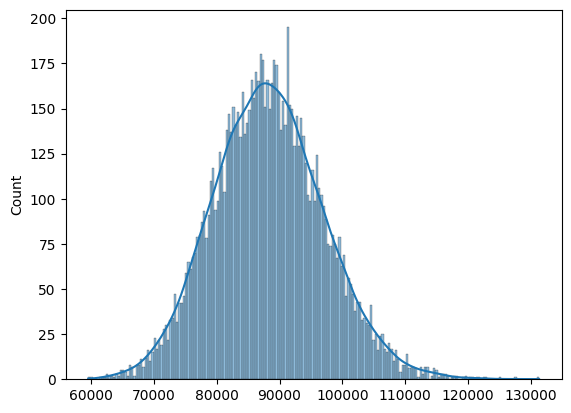

In [158]:
sns.histplot(bootstrapped_sample_mean_0_17, kde = True, bins = 200)

### For Age 18 - 25 years:

In [111]:
df_age_18_to_25= df_age_18_to_25.groupby(['User_ID', 'Age'])[['Purchase']].sum()
df_age_18_to_25= df_age_18_to_25.reset_index()
df_age_18_to_25

,User_ID,Age,Purchase
0,1000018,0-17,0
1,1000018,18-25,1979047
2,1000018,26-35,0
3,1000018,36-45,0
4,1000018,46-50,0
...,...,...,...
7478,1006031,26-35,0
7479,1006031,36-45,0
7480,1006031,46-50,0
7481,1006031,51-55,0


Text(0, 0.5, 'sample_mean')

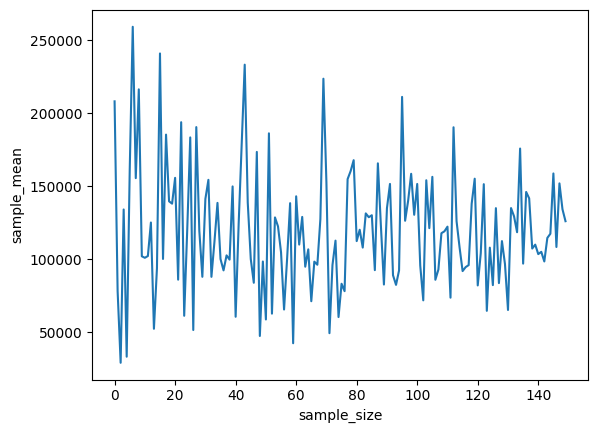

In [142]:
sample_size_trend=[]
for i in range(50,200):
    sample_mean= df_age_18_to_25['Purchase'].sample(i).mean()
    sample_size_trend.append(sample_mean)
plt.plot(sample_size_trend)
plt.xlabel("sample_size")
plt.ylabel("sample_mean")

**The confidence interval of total spending for age group 18-25 on the Black Friday:**

In [143]:

bootstrapped_sample_mean_18_25=[]
size = df_age_18_to_25['Purchase'].shape[0]
for i in range(10000):
    bootstrapped_sample=df_age_18_to_25['Purchase'].sample(size, replace = True).mean()
    bootstrapped_sample_mean_18_25.append((bootstrapped_sample))

<Axes: ylabel='Count'>

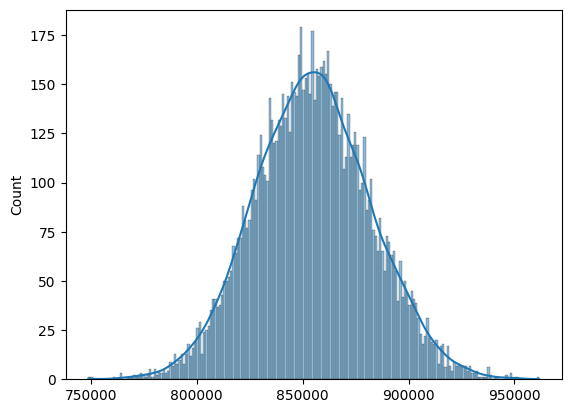

In [291]:
sns.histplot(bootstrapped_sample_mean_18_25, kde = True, bins = 200)

### For Age 26 - 35 years:

In [159]:
df_age_26_to_35= df_age_26_to_35.groupby(['User_ID', 'Age'])[['Purchase']].sum()
df_age_26_to_35 = df_age_26_to_35.reset_index()
df_age_26_to_35

,User_ID,Age,Purchase
0,1000003,0-17,0
1,1000003,18-25,0
2,1000003,26-35,341635
3,1000003,36-45,0
4,1000003,46-50,0
...,...,...,...
14366,1006040,26-35,1653299
14367,1006040,36-45,0
14368,1006040,46-50,0
14369,1006040,51-55,0


Text(0, 0.5, 'sample_mean')

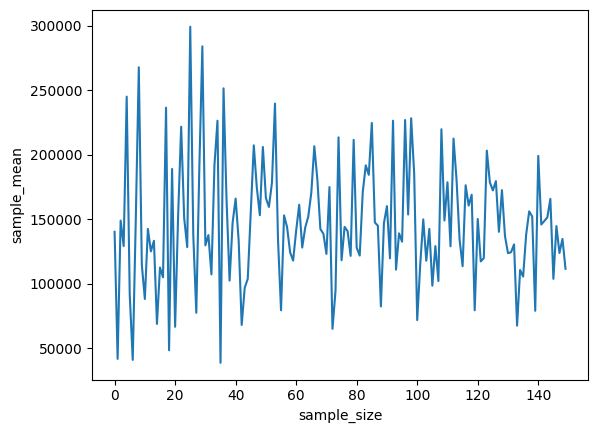

In [160]:
sample_size_trend=[]
for i in range(50,200):
    sample_mean= df_age_26_to_35['Purchase'].sample(i).mean()
    sample_size_trend.append(sample_mean)
plt.plot(sample_size_trend)
plt.xlabel("sample_size")
plt.ylabel("sample_mean")

**The confidence interval of total spending for age group 26-35 on the Black Friday:**

In [161]:

bootstrapped_sample_mean_26_35=[]
size = df_age_26_to_35['Purchase'].shape[0]
for i in range(10000):
    bootstrapped_sample=df_age_26_to_35['Purchase'].sample(size, replace = True).mean()
    bootstrapped_sample_mean_26_35.append((bootstrapped_sample))

In [162]:
np.mean(bootstrapped_sample_mean_26_35)

141379.6493847053

<Axes: ylabel='Count'>

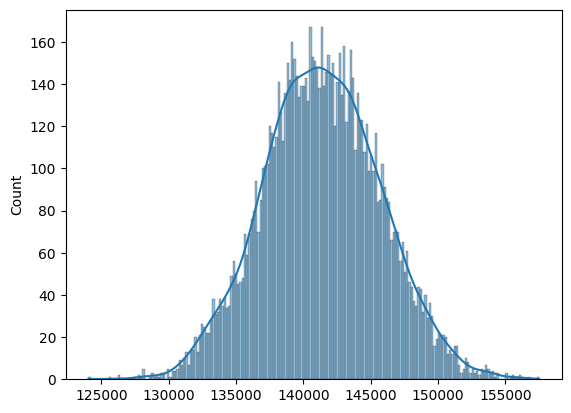

In [163]:
sns.histplot(bootstrapped_sample_mean_26_35, kde = True, bins = 200)

### For Age 36 - 45 years:

In [300]:
df_age_36_to_45= df_age_36_to_45.groupby(['User_ID', 'Age'])[['Purchase']].sum()
df_age_36_to_45 = df_age_36_to_45.reset_index()
df_age_36_to_45

,User_ID,Age,Purchase
0,1000007,36-45,234668
1,1000010,36-45,2169510
2,1000014,36-45,127629
3,1000016,36-45,150490
4,1000023,36-45,1670998
...,...,...,...
1162,1006011,36-45,1198714
1163,1006012,36-45,127920
1164,1006017,36-45,160230
1165,1006018,36-45,975585


Text(0, 0.5, 'sample_mean')

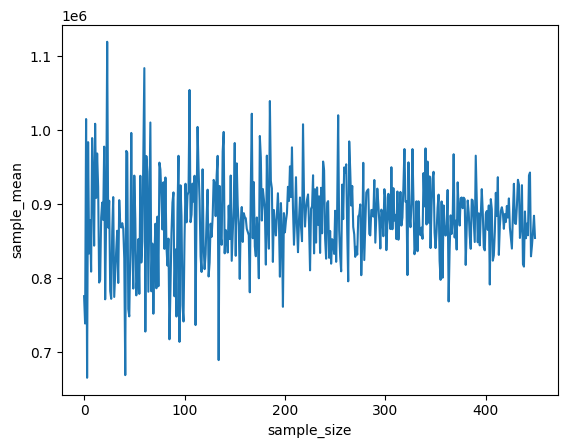

In [303]:
sample_size_trend=[]
for i in range(50,500):
    sample_mean= df_age_36_to_45['Purchase'].sample(i).mean()
    sample_size_trend.append(sample_mean)
plt.plot(sample_size_trend)
plt.xlabel("sample_size")
plt.ylabel("sample_mean")

In [305]:
bootstrapped_sample_mean_36_45=[]
size = df_age_36_to_45['Purchase'].shape[0]
for i in range(10000):
    bootstrapped_sample=df_age_36_to_45['Purchase'].sample(size, replace = True).mean()
    bootstrapped_sample_mean_36_45.append((bootstrapped_sample))

<Axes: ylabel='Count'>

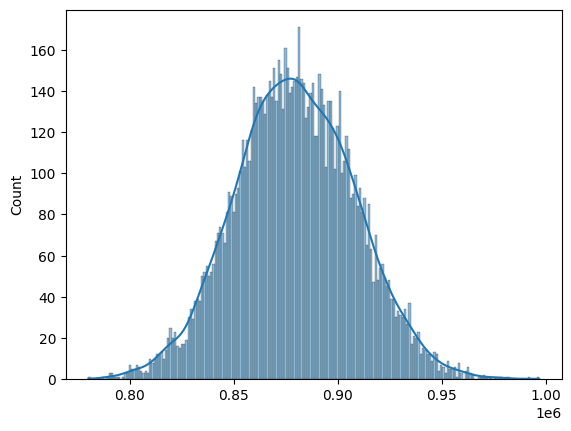

In [306]:
sns.histplot(bootstrapped_sample_mean_0_17, kde = True, bins = 200)

### For Age 46 - 50 years:

In [308]:
df_age_46_to_50 = df_age_46_to_50 .groupby(['User_ID', 'Age'])[['Purchase']].sum()
df_age_46_to_50  = df_age_46_to_50 .reset_index()
df_age_46_to_50 

,User_ID,Age,Purchase
0,1000004,46-50,206468
1,1000013,46-50,713927
2,1000033,46-50,1940418
3,1000035,46-50,821303
4,1000044,46-50,1180380
...,...,...,...
526,1006014,46-50,528238
527,1006016,46-50,3770970
528,1006032,46-50,517261
529,1006037,46-50,1119538


Text(0, 0.5, 'sample_mean')

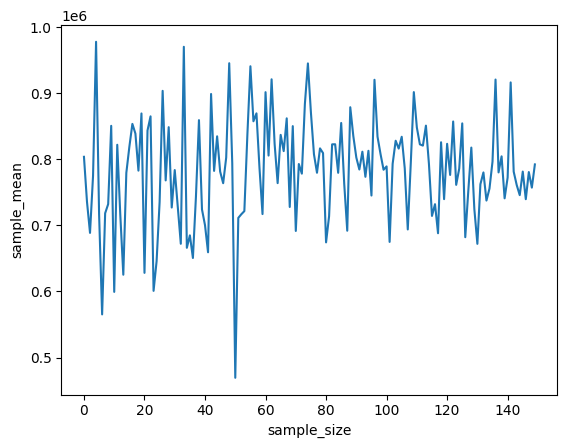

In [309]:
sample_size_trend=[]
for i in range(50,200):
    sample_mean= df_age_46_to_50 ['Purchase'].sample(i).mean()
    sample_size_trend.append(sample_mean)
plt.plot(sample_size_trend)
plt.xlabel("sample_size")
plt.ylabel("sample_mean")

In [311]:
bootstrapped_sample_mean_46_50=[]
size = df_age_46_to_50['Purchase'].shape[0]
for i in range(10000):
    bootstrapped_sample=df_age_46_to_50['Purchase'].sample(size, replace = True).mean()
    bootstrapped_sample_mean_46_50.append((bootstrapped_sample))

<Axes: ylabel='Count'>

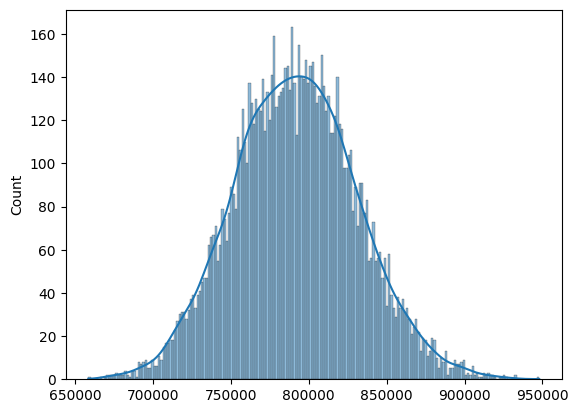

In [312]:
sns.histplot(bootstrapped_sample_mean_46_50, kde = True, bins = 200)

In [103]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df
amt_df['Age'].value_counts()
sample_size = 200
num_repitions = 1000
all_means = {}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []
for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0- 17']:
    new_df = amt_df[amt_df['Age']==val]
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean() 
    lower_lim = sample_mean - margin_of_error_clt 
    upper_lim = sample_mean + margin_of_error_clt
    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0- 17 --> confidence interval of means: (nan, nan)


# 5. Final Insights - Illustrate the insights based on exploration and CLT

 - Majority of the transactions are done by males as copmpared to females. Let say out of 4 transactions, three are done by males and 1 by female.
 
 - 82.33 % of the total transactions are made by the customers belonging to 11 occupations. These are 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6 (Ordered in descending order of the total transactions' share.)
 
 - Majority of the transactions are done by the customers living in the city for 1 or 2 years.
 
 - Top 5 product categories are 5, 1, 8, 11 and 2.
 
 - The gender distribution can be defines as 1666 for females customers and 4225 as males customers.On an average each male makes a total purchase of 925438.92 on Black Friday while for each female the figure is 712269.56.
 
 - On an average each male makes a total purchase of 925438.92 on Black Friday while for each female the figure is 712269.56.
 
 - 76.72% of the total transactions are done by males.
 
 - The marital status distribution can be defines as 42% as married and 58% as singles.
 
 - Average transactions made by married people is 91, whereas 95 are done by single.
 
 - Average purchase done by married customers on Black Friday is 843469.79 where as by singles is 880526.31.
 
 - Single people generated 59.05% total revenue
 
 - Age group 26 - 45 made the majority of the transactions
 
 - 81.82% od the total transactions are done by the age group 18 and 50 years.
 
 - 82.26% of the total customers belong to city C and B
 
 - Walmart generated 41.52 % of the total revenue from the customers belonging to the city B, 32.65 % from city C and 25.83 % from city A on Black Friday.
 
 - The population mean of total spending of each male will be approximately is 925156.36 and by female is 925156.36.
 
 

# 6. Recommendations:

- Targeted marketing strategies: The majority of transactions are made by males, tailor marketing strategies based on the interest and preferences. Include promotional activities, product offerings, or advertising campaigns.

- Consider popular occupations: Target 11 occupations that has 82%+ transactions collectively. We can understand their need and requirements and can focus on marketing efforts to create targeted marketing campaigns and customized offers.

- Communicate with new residents: More than 50% of the transactions are made by the residents who have recently shifted to the city, utilizing this opportunity can help in creating targeted marketing campaigns and customized offers.

- We can emphasis on the popular productt categories

- Target customers that are single 

- Optimize strategies to increase the revenue from age group 26 - 45

- Marketing campaigns can be conducted on the basis of location i.e. location based marketing

- To pay more attention towards top-elling poroduct categories

- Personalised offers for the high spending customers

- Enhance offerings with products and allow customers to cater some freebies

- To have customer engagement by providing some more offers and encourage them to spend more.

- Collaborate with good brands and create partnerships

- Create season based or event based offers and promotional activities

- Competitive price and promotions and offers to encourage customers to spend more and get more products.
